# FMP Stock Fundamentals Exploration Number : SEC Documents

Welcome to this Jupyter Notebook of the Finsloth.

Our goal is to understand **the meaning and the structure of each data given by FMP, how to transform it for actual use in any trading or investing strategies**.

## About Financial Modeling Prep

Financial Modeling Prep is a stock market API that provides a wide range of data. Data covers stocks, crypto forex and commodities.

You have addition data such as institutional stock ownership, esg score, price target, etc.

There are several plans including a free one.

I am on a start plan for this notebook. Here are the link for the pricing: https://site.financialmodelingprep.com/developer/docs/pricing/

## Key qualitiative information

While quantitative information is already obvious when analysing stocks, it might be useful to check out key qualitiative data.

Qualitative data can include:
- recent news about a company,
- earning reports,
- strategy papers about the company.

While this is not obvious at the beginning, this can play a key role in understanding market dynamics, and thus, anticipating potential price scenarios.

## Initial Import and API Key

In this section, we are going to perform classic libraries import to perform our data transformation and visualisation.

In [218]:
# We import the basics and some specific to APIs libraries

# Basic Data Manipulation Librairies
import pandas as pd

# requests is another way of sending an API request to FMP
import requests

# json library makes it easier to access JSON format
import json

For privacy reason, I have hidden my key to access the API.

Here is the link to the dashboard where you can find your private key in case you created an account: https://site.financialmodelingprep.com/developer/docs/dashboard

In [256]:
# Because I want to share this file on Github, I made sure that it's not showing the actual key.
key=pd.read_csv('/Users/kevinrakotondrasoa/Documents/coding/key.txt', header=None)[0][0]

print(key)

77634c85fe40f0ad2d7a48146f7fbfa4


FMP provides us the right method to extract data from its API according to the coding language you are using.

Here is the function they provided us to extract data with Python.

## List of dates and links

List of dates and links corresponds to all the Financial Reports that have been out about a specific company.

In our case, we are studying Amazon's case. 

In [257]:
# Building our url
url = "https://financialmodelingprep.com/api/v4/financial-reports-dates?symbol=AMZN&apikey="+key

# Building our requests
# lodl corresponds to list of dates and links
lodl = requests.get(url).json()

### Raw exploration

In [258]:
# Inspecting first level of inrofmation
lodl[0]

{'symbol': 'AMZN',
 'date': '2021',
 'period': 'FY',
 'linkXlsx': 'https://financialmodelingprep.com/api/v4/financial-reports-xlsx?symbol=AMZN&year=2021&period=FY&apikey=YOUR_API_KEY',
 'linkJson': 'https://financialmodelingprep.com/api/v4/financial-reports-json?symbol=AMZN&year=2021&period=FY&apikey=YOUR_API_KEY'}

We can see that we do have a one level JSON which can easily be transformed into a dataframe

In [222]:
# Building our DataFrame
lodl = pd.DataFrame(lodl)

In [223]:
# Inspecting
lodl.head()

,symbol,date,period,linkXlsx,linkJson
0,AMZN,2021,FY,https://financialmodelingprep.com/api/v4/finan...,https://financialmodelingprep.com/api/v4/finan...
1,AMZN,2020,FY,https://financialmodelingprep.com/api/v4/finan...,https://financialmodelingprep.com/api/v4/finan...
2,AMZN,2019,FY,https://financialmodelingprep.com/api/v4/finan...,https://financialmodelingprep.com/api/v4/finan...
3,AMZN,2018,FY,https://financialmodelingprep.com/api/v4/finan...,https://financialmodelingprep.com/api/v4/finan...
4,AMZN,2017,FY,https://financialmodelingprep.com/api/v4/finan...,https://financialmodelingprep.com/api/v4/finan...


In [224]:
# Understanding structure of the dataframe:
lodl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   symbol    66 non-null     object
 1   date      66 non-null     object
 2   period    66 non-null     object
 3   linkXlsx  66 non-null     object
 4   linkJson  47 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


What we can observe now, is that the data is organized by years.

Let's change the index of the dataframe, and get rid of unecessary columns.

In [225]:
# Resetting index
lodl.reset_index()

# Removing unecessary columns
lodl.drop(columns=['symbol', 'period'], inplace=True)

# adding a new index
lodl.set_index('date', inplace=True)

In [226]:
# Inspecting
lodl.head()

,linkXlsx,linkJson
date,,
2021,https://financialmodelingprep.com/api/v4/finan...,https://financialmodelingprep.com/api/v4/finan...
2020,https://financialmodelingprep.com/api/v4/finan...,https://financialmodelingprep.com/api/v4/finan...
2019,https://financialmodelingprep.com/api/v4/finan...,https://financialmodelingprep.com/api/v4/finan...
2018,https://financialmodelingprep.com/api/v4/finan...,https://financialmodelingprep.com/api/v4/finan...
2017,https://financialmodelingprep.com/api/v4/finan...,https://financialmodelingprep.com/api/v4/finan...


We won't go any further in this part of analysis. Now we want to extract one of the links and see what's in it.

In [227]:
lodl.loc['2019', 'linkJson']

date
2019    https://financialmodelingprep.com/api/v4/finan...
2019    https://financialmodelingprep.com/api/v4/finan...
2019    https://financialmodelingprep.com/api/v4/finan...
2019    https://financialmodelingprep.com/api/v4/finan...
2019    https://financialmodelingprep.com/api/v4/finan...
Name: linkJson, dtype: object

Now, one of the main issues is that if we click on one link, we may end up on a url that requires our key. Make sure you get one and add it to the given link.

In order to go faster, we will provide a small trick here: using integrated python librairy called webbrowser.

It will allow us to use our key and open the link. We will use the function open in the webbroser library.

In [228]:
# importing our webbrowser library
import webbrowser

In [229]:
# building the link to the first reference of 2019
first = lodl.loc['2019', 'linkJson'][0][:-len('YOUR_API-KEY')]+key

In [230]:
# opening our link
webbrowser.open(first)

True

We get a link to a JSON that represents a 10K for the company Amazon.

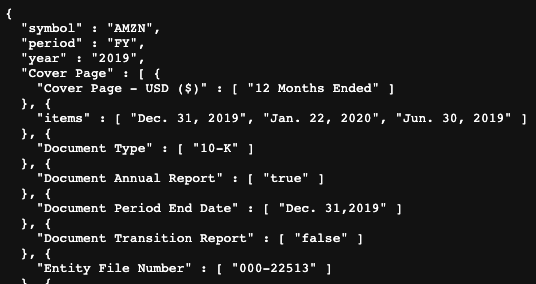

Let's loop through all our links to see if these are all 10K documents. We'll explain in the next point what is a 10K

In [231]:
# Building a list of our different link for 2019
list1 = lodl.loc['2019', 'linkJson']

In [232]:
# If executed, all the different links for 2019 are opened in new tabs
for i in range(len(list1)):
    webbrowser.open(lodl.loc['2019', 'linkJson'][i][:-len('YOUR_API-KEY')]+key)

Most of documents provided are 10-k which are annual reports, or 10-q, which corresponds to quarters.

For the first one, there is an API request that gives us access to it.

## Annual Reports on Form 10-K

Here are some key facts about the 10-K reports:
- A 10-K is a **comprehensive report filed annually by public companies about their financial performance**.
- The report is required by the U.S. Securities and Exchange Commission (SEC) and is far more detailed than the annual report.
- Information in the 10-K includes corporate history, financial statements, earnings per share, and any other relevant data.
- The 10-K is a useful tool for investors to make important decisions about their investments.

Find more details on Investopedia: https://www.investopedia.com/terms/1/10-k.asp

While 10-K are of course available in our 

### Exploring our API

We are first going a raw exploration of the url before transforming the data the way we want.

As usual, we will:
- build our url,
- call our url,
- understand its structure,
- transform it to the best shape we can use it.

In [233]:
# Building our url of 10K
url2 = 'https://financialmodelingprep.com/api/v4/financial-reports-json?symbol=AMZN&year=2020&period=FY&apikey='+key

In [234]:
# Calling our url
# tenk correponds to form 10-k

tenk = requests.get(url2).json()

In [235]:
# inspecting
tenk

{'symbol': 'AMZN',
 'period': 'FY',
 'year': '2020',
 'Cover Page': [{'Cover Page - USD ($)': ['12 Months Ended']},
  {'items': ['Dec. 31, 2020', 'Jan. 20, 2021', 'Jun. 30, 2020']},
  {'Document Type': ['10-K']},
  {'Document Annual Report': ['true']},
  {'Document Period End Date': ['Dec. 31,2020']},
  {'Current Fiscal Year End Date': ['--12-31']},
  {'Document Transition Report': ['false']},
  {'Entity File Number': ['000-22513']},
  {'Entity Registrant Name': ['AMAZON.COM, INC.']},
  {'Entity Incorporation, State or Country Code': ['DE']},
  {'Entity Tax Identification Number': ['91-1646860']},
  {'Entity Address, Address Line One': ['410 Terry Avenue North']},
  {'Entity Address, City or Town': ['Seattle']},
  {'Entity Address, State or Province': ['WA']},
  {'Entity Address, Postal Zip Code': ['98109-5210']},
  {'City Area Code': ['206']},
  {'Local Phone Number': ['266-1000']},
  {'Title of 12(b) Security': ['Common Stock, par value $.01 per share']},
  {'Trading Symbol': ['AMZN'

As we can see, there are a lot of information within this 10-K document. We need to extract all the different keys into this dictionnary, and explore most interesting sections.

In [236]:
# Extracting keys of 10-k
tenk.keys()

dict_keys(['symbol', 'period', 'year', 'Cover Page', 'Consolidated Statements of Cash', 'Consolidated Statements Of Oper', 'Consolidated Statements of Comp', 'Consolidated Statements of Co_2', 'Consolidated Balance Sheets', 'Consolidated Balance Sheets (Pa', 'Consolidated Statements of Stoc', 'Description of Business, Accoun', 'Financial Instruments', 'Property and Equipment', 'Leases', 'Acquisitions, Goodwill, and Acq', 'Debt', 'Commitments and Contingencies', "Stockholders' Equity", 'Income Taxes', 'Segment Information', 'Quarterly Results (Unaudited)', 'Description of Business, Acco_2', 'Description of Business, Acco_3', 'Financial Instruments (Tables)', 'Property and Equipment (Tables)', 'Leases (Tables)', 'Acquisitions, Goodwill, and A_2', 'Debt (Tables)', 'Commitments and Contingencies (', "Stockholders' Equity (Tables)", 'Income Taxes (Tables)', 'Segment Information (Tables)', 'Quarterly Results (Unaudited) (', 'Description of Business, Acco_4', 'Description of Business, Acco_5'

In [237]:
# Exploring one of the keys
tenk['Description of Business, Accoun']

[{'Description of Business, Accounting Policies, and Supplemental Disclosures': ['12 Months Ended']},
 {'items': ['Dec. 31, 2020']},
 {'Description of Business, Accounting Policies, and Supplemental Disclosures': ['DESCRIPTION OF BUSINESS, ACCOUNTING POLICIES, AND SUPPLEMENTAL DISCLOSURES Description of Business We seek to be Earth’s most customer-centric company. In each of our segments, we serve our primary customer sets, consisting of consumers, sellers, developers, enterprises, and content creators. We serve consumers through our online and physical stores and focus on selection, price, and convenience. We offer programs that enable sellers to grow their businesses, sell their products in our stores, and fulfill orders through us, and programs that allow authors, musicians, filmmakers, skill and app developers, and others to publish and sell content. We serve developers and enterprises of all sizes through AWS, which offers a broad set of on-demand technology services, including co

What we can see here, is that for each key, there is a sub dictionnary containing key information.

In general rule, the 10-K report has a lot of data in it. It the the most complete report a company can provide about its activities.

Here are the 5 main part of 10-k document:
 - **Business**. This provides an overview of the company’s main operations, including its products and services (i.e., how it makes money).
- **Risk factors**. These outline any and all risks the company faces or may face in the future. The risks are typically listed in order of importance.
- **Selected financial data**. This section details specific financial information about the company over the last five years. This section presents more of a near-term view of the company’s recent performance.
- **Management’s discussion and analysis of financial condition and results of operations**. Also known as **MD&A**, this gives the company an opportunity to explain its business results from the previous fiscal year. This section is where the company can tell its story in its own words.
- **Financial statements and supplementary data**. This includes the company’s audited financial statements including the income statement, balance sheets, and statement of cash flows. A letter from the company’s independent auditor certifying the scope of their review is also included in this section.

source: https://www.investopedia.com/terms/1/10-k.asp

To have a better understanding of the structure of our call and find these 5 steps, we will reorganize this call in a DataFrame.

In [238]:
# Building our dataframe of 10-K
tenklist = []
for key in tenk.keys():
    tenklist.append(key)

tenkdf = pd.DataFrame(tenklist)

In [239]:
# Inspecting
tenkdf

,0
0,symbol
1,period
2,year
3,Cover Page
4,Consolidated Statements of Cash
...,...
86,Segment Information - Reconcili
87,Segment Information - Reconci_2
88,Segment Information - Reconci_3
89,Segment Information - Depreciat


There are more than 91 sections in the 10-K of Amazon. While it's complete, and "cmd/ctrl + F" method could help us find the section we are interested in, we will try to use another library that could play a role.

Re is a library that helps us find specific string in our dataframe.

We will import it and search for qualitative data such as "Risk" or "Management".

In [240]:
# importing our library
import re

Let's first try by finding the word "risk" within our dataframe if it exists.

In [241]:
# using re to build our filter to find the term risk.
# we ignore case and na.
risk = tenkdf[0].str.contains('risk', flags = re.IGNORECASE, regex = True, na = False)

# Applying our filter to our dataframe
tenkdf[risk]

,0


As we can see here, we didn't find the term "risk" in our high level dictionnary. I might therefore lie in one of the subsection of the given document. We won't dig dipper here as this is a data exploratory notebook, and not a specific topic one.

However, as it might still be useful the reader understands which section we are talking about, here is the link to the latest 10-K of Amazon.

the link to SEC 10-K: https://sec.report/Document/0001018724-22-000005/#i10ffcc0db5d74ac5a2de7ca2ad731f50_19

#### Conclusion on 10-K

The 10-K document definitely provides key information that should be considered when making investment strategies. Though we didn't go all the way into the data, which takes a lot of effort here, I would recommend having a long at the SEC report, and inspire oneself from it to extract the right part.

## Shares Float

There are different kind of shares in a company: Authorized Shares,Shares Outstanding and Shares Float.

The latter is the one retail investors are allowed to trade.

Thanks to Financial Modelling Prep, we can access:
- The Free Float,
- Oustanding Shares,
- Float Shares.

Free Float is important to investors as it gives indication on whether or not a stock is exposed to high fluctuation due to institutional investors, and if there is enough liquidity, thus reducing the bid-ask spread.

source: https://corporatefinanceinstitute.com/resources/knowledge/trading-investing/free-float/

Let's have a look to Amazon Free Float.

In [259]:
# Building our url
url3 ='https://financialmodelingprep.com/api/v4/shares_float?symbol=AMZN&apikey='+key
# Calling our url
# sf stands for shares float
sf = requests.get(url3).json()

In [260]:
# Inspecting
sf

[{'symbol': 'AMZN',
  'date': '2022-09-14',
  'freeFloat': 90.03960180268847,
  'floatShares': 9172874358,
  'outstandingShares': 10187599872,
  'source': 'https://www.sec.gov/Archives/edgar/data/1018724/000101872422000019/amzn-20220630.htm'}]

As we can see, it's a one level JSON, Easily convertible to a Pandas DataFrame

In [261]:
# Transforming our JSON to a pandas dataframe
sfdf = pd.DataFrame(sf)

# Inspecting
sfdf

,symbol,date,freeFloat,floatShares,outstandingShares,source
0,AMZN,2022-09-14,90.039602,9172874358,10187599872,https://www.sec.gov/Archives/edgar/data/101872...


Further manipulation could bring us to change the index. But as it's only a row dataframe, it's not an obligation here.

Note that, freeFloat is actually the pourcentage of float shares on outstanding shares.

## SEC Filings

SEC filings correspond to all kind of documents that are published through the SEC. It include all type of filings.

Through the Financial Modelling Prep API, it's possible to either access information per company, or with all companies available in an RSS Feed.

### RSS Feeds

The RSS Feed provides all the newest information about stock market in a constant live feed so you don't miss any information.

It include all the content posted by the SEC.

In [262]:
# Building our call of the RSS Feed
url4 ='https://financialmodelingprep.com/api/v3/rss_feed?page=0&apikey='+key

# Calling the Rss feed
rss = requests.get(url4).json()

In [263]:
# Inspecting
rss

[{'title': '6-K - Largo Inc. (0001400438) (Filer)',
  'date': '2022-09-15 17:29:17',
  'link': 'https://www.sec.gov/Archives/edgar/data/1400438/000106299322019582/0001062993-22-019582-index.htm',
  'cik': '0001400438',
  'form_type': '6-K',
  'ticker': 'LGO'},
 {'title': '6-K - mCloud Technologies Corp. (0001756499) (Filer)',
  'date': '2022-09-15 17:26:13',
  'link': 'https://www.sec.gov/Archives/edgar/data/1756499/000127956922001540/0001279569-22-001540-index.htm',
  'cik': '0001756499',
  'form_type': '6-K',
  'ticker': 'MCLDW'},
 {'title': '6-K - mCloud Technologies Corp. (0001756499) (Filer)',
  'date': '2022-09-15 17:26:13',
  'link': 'https://www.sec.gov/Archives/edgar/data/1756499/000127956922001540/0001279569-22-001540-index.htm',
  'cik': '0001756499',
  'form_type': '6-K',
  'ticker': 'MCLD'},
 {'title': '6-K - Nu Holdings Ltd. (0001691493) (Filer)',
  'date': '2022-09-15 17:03:06',
  'link': 'https://www.sec.gov/Archives/edgar/data/1691493/000129281422003801/0001292814-22-0

This is our page 0 of the Rss Feed. There are other pages. We won't go on them though, as we are exploring the structure of the data and build a reusable format rather than exploring for analysis.

We can clearly see that it's a one level dictionnary, which can clearly be transformed into a DataFrame.

One key element here is to have the main index as a DateTime index.

As usual, we will transform our data in the following order:
- Building our column,
- Building our DataFrame,
- Resetting index,
- Adding our new index,
- Changing our index to a DateTime.

In [266]:
# Building our column
columns = []
for key in rss[0].keys():
    columns.append(key)
    
# Inspecting
print(columns)

['title', 'date', 'link', 'cik', 'form_type', 'ticker']


In [268]:
# Building our DataFrame
rssdf = pd.DataFrame(rss, columns=columns)

# Inspecting
rssdf

,title,date,link,cik,form_type,ticker
0,6-K - Largo Inc. (0001400438) (Filer),2022-09-15 17:29:17,https://www.sec.gov/Archives/edgar/data/140043...,0001400438,6-K,LGO
1,6-K - mCloud Technologies Corp. (0001756499) (...,2022-09-15 17:26:13,https://www.sec.gov/Archives/edgar/data/175649...,0001756499,6-K,MCLDW
2,6-K - mCloud Technologies Corp. (0001756499) (...,2022-09-15 17:26:13,https://www.sec.gov/Archives/edgar/data/175649...,0001756499,6-K,MCLD
3,6-K - Nu Holdings Ltd. (0001691493) (Filer),2022-09-15 17:03:06,https://www.sec.gov/Archives/edgar/data/169149...,0001691493,6-K,NU
4,10-K - LIGHTPATH TECHNOLOGIES INC (0000889971)...,2022-09-15 16:59:03,https://www.sec.gov/Archives/edgar/data/889971...,0000889971,10-K,LPTH
...,...,...,...,...,...,...
95,6-K - BARCLAYS BANK PLC (0000312070) (Filer),2022-09-15 09:00:12,https://www.sec.gov/Archives/edgar/data/312070...,0000312070,6-K,SBUG
96,6-K - BARCLAYS BANK PLC (0000312070) (Filer),2022-09-15 09:00:12,https://www.sec.gov/Archives/edgar/data/312070...,0000312070,6-K,VXZ
97,6-K - BARCLAYS BANK PLC (0000312070) (Filer),2022-09-15 09:00:12,https://www.sec.gov/Archives/edgar/data/312070...,0000312070,6-K,IMLP
98,6-K - BARCLAYS BANK PLC (0000312070) (Filer),2022-09-15 09:00:12,https://www.sec.gov/Archives/edgar/data/312070...,0000312070,6-K,GAZ


In [284]:
# Setting new index
rssdf.set_index('date', inplace=True)

In [285]:
# Changing our index to datetime
rssdf.index = pd.to_datetime(rssdf.index)

In [309]:
# Checking the datetime index 
print(rssdf.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2022-09-15 17:29:17 to 2022-09-15 09:00:12
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      100 non-null    object
 1   link       100 non-null    object
 2   cik        100 non-null    object
 3   form_type  100 non-null    object
 4   ticker     100 non-null    object
 5   year       100 non-null    int64 
 6   month      100 non-null    int64 
 7   day        100 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 7.0+ KB
None


In [310]:
# Inspecting the dataframe
rssdf.head()

,title,link,cik,form_type,ticker,year,month,day
date,,,,,,,,
2022-09-15 17:29:17,6-K - Largo Inc. (0001400438) (Filer),https://www.sec.gov/Archives/edgar/data/140043...,0001400438,6-K,LGO,2022,9,15
2022-09-15 17:26:13,6-K - mCloud Technologies Corp. (0001756499) (...,https://www.sec.gov/Archives/edgar/data/175649...,0001756499,6-K,MCLDW,2022,9,15
2022-09-15 17:26:13,6-K - mCloud Technologies Corp. (0001756499) (...,https://www.sec.gov/Archives/edgar/data/175649...,0001756499,6-K,MCLD,2022,9,15
2022-09-15 17:03:06,6-K - Nu Holdings Ltd. (0001691493) (Filer),https://www.sec.gov/Archives/edgar/data/169149...,0001691493,6-K,NU,2022,9,15
2022-09-15 16:59:03,10-K - LIGHTPATH TECHNOLOGIES INC (0000889971)...,https://www.sec.gov/Archives/edgar/data/889971...,0000889971,10-K,LPTH,2022,9,15
...,...,...,...,...,...,...,...,...
2022-09-15 09:00:12,6-K - BARCLAYS BANK PLC (0000312070) (Filer),https://www.sec.gov/Archives/edgar/data/312070...,0000312070,6-K,SBUG,2022,9,15
2022-09-15 09:00:12,6-K - BARCLAYS BANK PLC (0000312070) (Filer),https://www.sec.gov/Archives/edgar/data/312070...,0000312070,6-K,VXZ,2022,9,15
2022-09-15 09:00:12,6-K - BARCLAYS BANK PLC (0000312070) (Filer),https://www.sec.gov/Archives/edgar/data/312070...,0000312070,6-K,IMLP,2022,9,15


In [324]:
# importing the datetime librairy
from datetime import datetime

In [325]:
# building our custom datetime
dt = datetime(2022, 9, 15, 17)

In [326]:
# subsetting our dataframe
yesterday = rssdf[(rssdf.index.hour < dt.hour) & (rssdf.index.day == dt.day)]

In [327]:
# Inspecting
yesterday

,title,link,cik,form_type,ticker,year,month,day
date,,,,,,,,
2022-09-15 16:59:03,10-K - LIGHTPATH TECHNOLOGIES INC (0000889971)...,https://www.sec.gov/Archives/edgar/data/889971...,0000889971,10-K,LPTH,2022,9,15
2022-09-15 16:49:12,6-K - ParcelPal Logistics Inc. (0001819074) (F...,https://www.sec.gov/Archives/edgar/data/181907...,0001819074,6-K,PTNYF,2022,9,15
2022-09-15 16:45:43,"10-K - Rezolute, Inc. (0001509261) (Filer)",https://www.sec.gov/Archives/edgar/data/150926...,0001509261,10-K,RZLT,2022,9,15
2022-09-15 16:30:53,6-K - Relief Therapeutics Holding SA (00018540...,https://www.sec.gov/Archives/edgar/data/185407...,0001854078,6-K,RLFTF,2022,9,15
2022-09-15 16:30:53,6-K - Relief Therapeutics Holding SA (00018540...,https://www.sec.gov/Archives/edgar/data/185407...,0001854078,6-K,RLFTY,2022,9,15
...,...,...,...,...,...,...,...,...
2022-09-15 09:00:12,6-K - BARCLAYS BANK PLC (0000312070) (Filer),https://www.sec.gov/Archives/edgar/data/312070...,0000312070,6-K,SBUG,2022,9,15
2022-09-15 09:00:12,6-K - BARCLAYS BANK PLC (0000312070) (Filer),https://www.sec.gov/Archives/edgar/data/312070...,0000312070,6-K,VXZ,2022,9,15
2022-09-15 09:00:12,6-K - BARCLAYS BANK PLC (0000312070) (Filer),https://www.sec.gov/Archives/edgar/data/312070...,0000312070,6-K,IMLP,2022,9,15


As we can see, it's easy to check the logs for a given day. Here we were able to see what happened yesterday before 5pm using a subsetting based on a datetime object.

Now let's have a look at the unique values found in the title columns.

In [322]:
# Extracting all unique values
unique = rssdf['title'].unique()

In [323]:
# Inspecting
unique

array(['6-K - Largo Inc. (0001400438) (Filer)',
       '6-K - mCloud Technologies Corp. (0001756499) (Filer)',
       '6-K - Nu Holdings Ltd. (0001691493) (Filer)',
       '10-K - LIGHTPATH TECHNOLOGIES INC (0000889971) (Filer)',
       '6-K - ParcelPal Logistics Inc. (0001819074) (Filer)',
       '10-K - Rezolute, Inc. (0001509261) (Filer)',
       '6-K - Relief Therapeutics Holding SA (0001854078) (Filer)',
       '10-K - Zscaler, Inc. (0001713683) (Filer)',
       '6-K - Babylon Holdings Ltd (0001866390) (Filer)',
       '6-K - TORONTO DOMINION BANK (0000947263) (Filer)',
       '6-K - ENETI INC. (0001587264) (Filer)',
       '10-Q - Mobiv Acquisition Corp (0001931691) (Filer)',
       '6-K - TFI International Inc. (0001588823) (Filer)',
       '10-K - Bowlero Corp. (0001840572) (Filer)',
       '6-K - ReneSola Ltd (0001417892) (Filer)',
       '6-K - Evogene Ltd. (0001574565) (Filer)',
       '6-K - B2GOLD CORP (0001429937) (Filer)',
       '6-K - Stellantis N.V. (0001605484) (File

We could spend time redoing a DataFrame with all the different types of documents which are pretty much the same.

What is interesting with extracting the feed is that it can trigger an event that would have a strong influence on the market. Thus, participating to building a strong strategy.

## Conclusion

Financial Modelling Prep provides a plethora of useful information that deserves to be used. 

Part of them is qualitative data. It is very important to understand that Finance, in general, is not only about observing charts and using "kinda" mathematics to guess the price of a stock.

It's a broad topic, that includes many areas of business (sales, legal, tech). These must be included in an investment strategy to reduce investment risks.